# Laser Sensor Outdoor Tests

## Objective

Determine Garmin's LIDAR Lite V4's capability in detecting and gauging distances of vehicles in genuine outdoor settings.

## Experiment Details

### Experiment Setup

1. **Stationary Test**: The sensor was initially mounted on a stationary bike alongside a busy road to gauge its proficiency in detecting passing vehicles.
2. **Dynamic Test**: Retaining the setup, the bike was ridden by a food delivery rider, collecting data from vehicles overtaking the cyclist. This step transitioned the evaluation from a controlled setting to a more dynamic environment, offering insights into real-world applicability.

### Data Extraction

- **Raspberry Pi**: As before, data from the sensor was published over to AWS IoT's message broker via MQTT. I then extracted the data in to text files. Each line of measurement contains the time, distance, and signal strength:

    ```text
    10:45:37 1623 4
    ```

## Code Setup

### Imports

To maintain a clean and organized notebook, various functionalities have been distributed into separate Python modules:

- [`cleaner.py`](../src/data/cleaner.py) includes data cleaning functions.
- [`loader.py`](../src/data/loader.py) aids in extracting sensor data from text files.
- [`outdoor_graphs.py`](../src/graphing/outdoor_graphs.py) provides utilities for data visualization.

In [1]:
import datetime
import pathlib
import sys

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

sys.path.append("../src")

from data import cleaner, loader
from graphing import outdoor_graphs

### Data Preparation and Loading

I load the data collected from the stationary tests.

In [2]:
YUAN_CHING_RD = pathlib.Path("../data/processed/lidar_outdoor_tests/yuan_ching_rd.txt")

## Stationary Test

In the first test, the sensor was mounted on a stationary bike along Yuan Ching Rd. which saw moderate traffic. I also mounted a Go Pro to capture a video of the vehicles that passed the bike. I cross referenced the data collected from the sensor and the Go Pro's video feed to determine the reliability of the sensor.

### Raw Data Analysis

- **Scatter Plot Observations**: At a glance, the sensor appears to reliably detect passing vehicles as seen from the clusters of dark points on the graph. However, it also appears to generate spurious data as seen from the individual points scattered throughout the graph.
- **Data Cleaning Objective**: Therefore, a cleaning algorithm could be used to improve the reliability of the sensor by removing these spurious points while keeping the clusters.

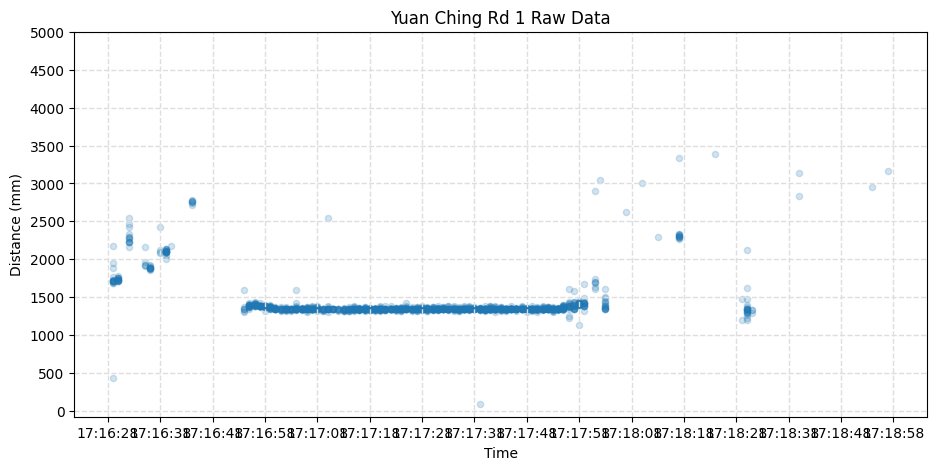

In [3]:
timings, distances, strengths = loader.filter_data_from_file(YUAN_CHING_RD)

fig, axes = plt.subplots(figsize=(11, 5))
outdoor_graphs.scatter_time_vs_distance(axes, timings, distances, "Yuan Ching Rd 1 Raw Data", intervals=10, rotate_xticks=True)
plt.show()

### Data Cleaning Algorithm

- **Cluster Identification**: Using the same cleaning algorithm as for the TOF sensor, distances that weren't in proximity (within two points) of other distances were removed, ensuring a minimum cluster size of 2 points.
- **Graphical Representation**: After cleaning, the spurious points appear to be removed while keeping the clusters representing the vehicle passes.

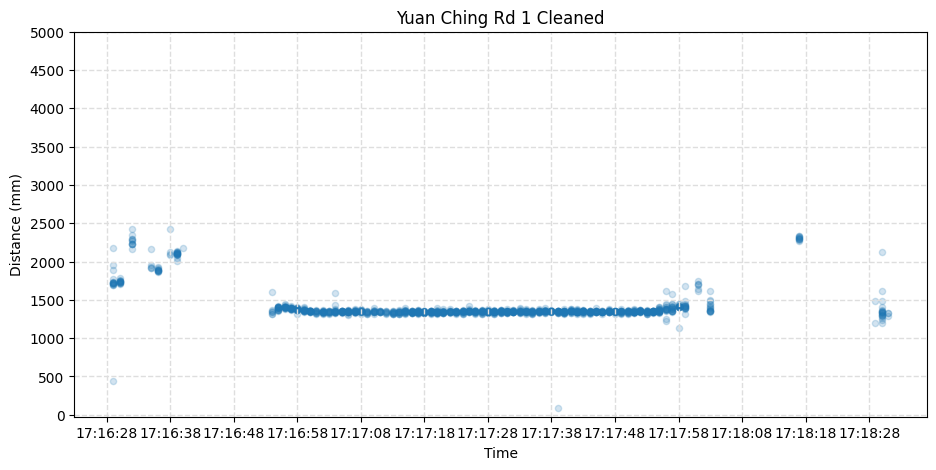

In [4]:
fig, axes = plt.subplots(figsize=(11, 5))
cleaned_distances = cleaner.clean_tof_data(distances)
outdoor_graphs.scatter_time_vs_distance(axes, timings, cleaned_distances, "Yuan Ching Rd 1 Cleaned", intervals=10, rotate_xticks=True)
plt.show()

## Data Cross-Reference with Video Feed